#In this notebook, I am creating some visualizations for pokepanda using matplot

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.patches as patches
import numpy as np

In [26]:
#Opening the excel file
gen_all = pd.ExcelFile("genall.xlsx")
genall = gen_all.parse("Sheet1", na_values = "")

In [27]:
#Making some changes to genall
genall["type2"] = genall["type2"].fillna(0)
genall["type2"] = genall["type2"].replace(0, "", regex = True)
genall["Types"] = genall[["type1", "type2"]].values.tolist()

genall["ability2"] = genall["ability2"].fillna(0)
genall["ability2"] = genall["ability2"].replace(0, "", regex = True)
genall["hability"] = genall["hability"].fillna(0)
genall["hability"] = genall["hability"].replace(0, "", regex = True)
genall["Abilities"] = genall[["ability1", "ability2", "hability"]].values.tolist()

In [28]:
#Defining functions for extracting types and regions
def get_type(dataframe, ptype, typecol = "Types"):
    #returns a dataframe with all the pokemon that are from that type. Please write the frame as the first parameter. Check if the name of the type columns is correct 
    y = dataframe[dataframe[typecol].apply(lambda x : ptype in x)]
    return y
def get_region(dataframe, region, regioncol = "region"):
    y = dataframe[dataframe[regioncol].apply(lambda x : region == x)]
    return y

#Creating the Region Visualization

In [29]:
#Extracting each region
kanto = get_region(genall, "Kanto")
johto = get_region(genall, "Johto")
hoenn = get_region(genall, "Hoenn")
sinnoh = get_region(genall, "Sinnoh")
unova = get_region(genall, "Unova")
kalos = get_region(genall, "Kalos")
alola = get_region(genall, "Alola")
galar = get_region(genall, "Galar")

In [30]:
#Creating lists for the plot function
colors_r = ["red", "yellow","limegreen", "violet", "grey", "royalblue", "deeppink", "darkorange"]
labels_r = ["Kanto", "Johto", "Hoenn", "Sinnoh", "Unova", "Kalos", "Alola", "Galar"]
all_ts = [kanto.totalstats.values, johto.totalstats.values, hoenn.totalstats.values, sinnoh.totalstats.values, unova.totalstats.values, kalos.totalstats.values, alola.totalstats.values, galar.totalstats.values]

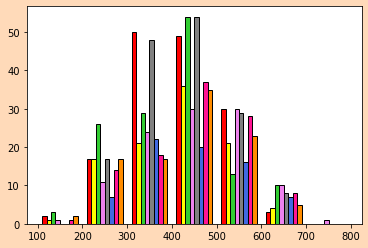

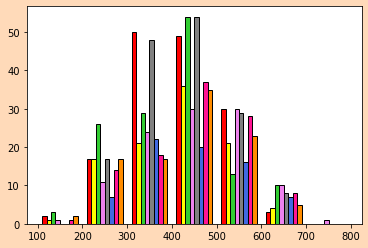

In [31]:
#Creating the figure and the axes
t_statsf, ax1 = plt.subplots(1, facecolor = "peachpuff", edgecolor = "k")
ax1.hist(all_ts, bins = [100,200,300,400,500,600,700,800], label = labels_r, color = colors_r, edgecolor='black', linewidth=1)
t_statsf

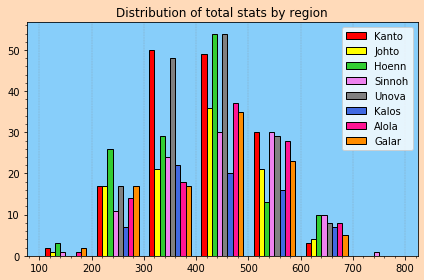

In [32]:
#Edition
ax1.set_title("Distribution of total stats by region", color = "k")
ax1.legend(loc = "best")
ax1.minorticks_on()
ax1.set_facecolor("lightskyblue")
ax1.grid(True, which = "major", axis = "x", color = "gray", ls = "-.", lw = 0.25)
t_statsf.tight_layout()
t_statsf

In [33]:
#Saving the graph
t_statsf.savefig("totalstatsbyregion.png", facecolor = t_statsf.get_facecolor())

Creating the type visualization

In [34]:
#Creating lists and dictionaries for the plot function
typelist = ["Rock", "Water", "Electric", "Grass", "Poison", "Psychic", "Ground", "Fire", "Flying", "Bug", "Normal", "Ghost", "Fighting", "Steel", "Ice", "Dragon", "Dark", "Fairy"]
colors = ["tan", "dodgerblue", "yellow", "limegreen", "mediumorchid", "deeppink", "peru", "red", "deepskyblue", "yellowgreen", "gainsboro", "mediumslateblue", "darkorange", "teal", "powderblue", "royalblue", "#3E365C", "lightpink"]
type_color = {}
for i in range(len(typelist)):
    type_color[typelist[i]] = colors[i] 
type_databases = {}
for i in typelist:
    type_databases[i] = get_type(genall, i)

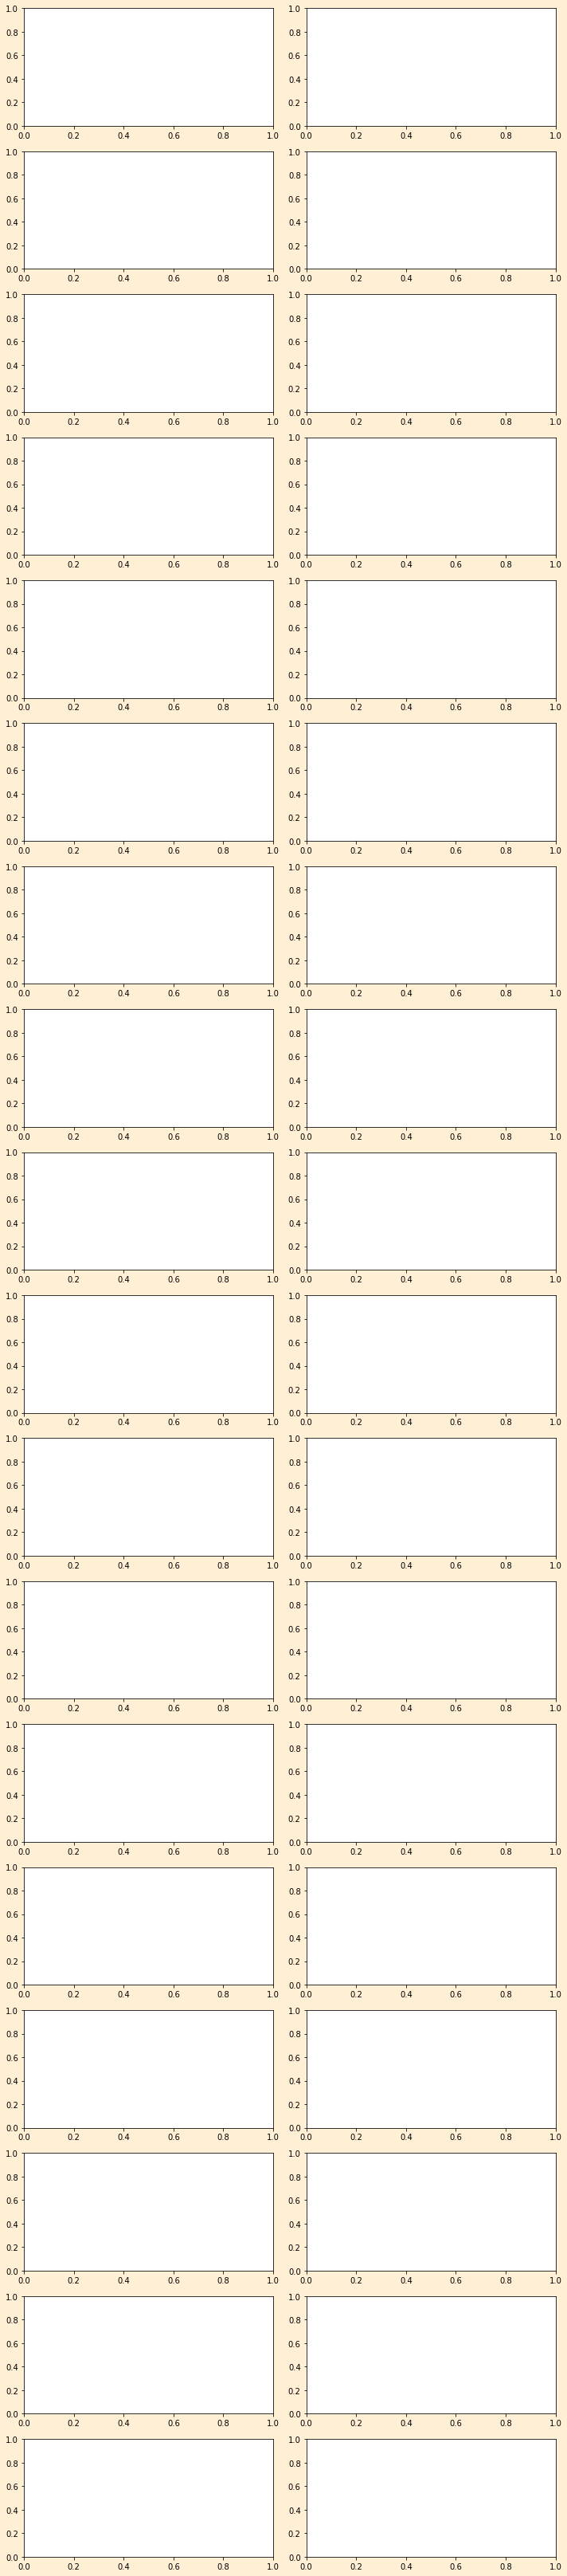

In [35]:
#Creating the figure
type_fig, type_axes = plt.subplots(18,2, facecolor = "papayawhip")
type_fig.set_figheight(45)
type_fig.set_figwidth(10)
type_fig.tight_layout()

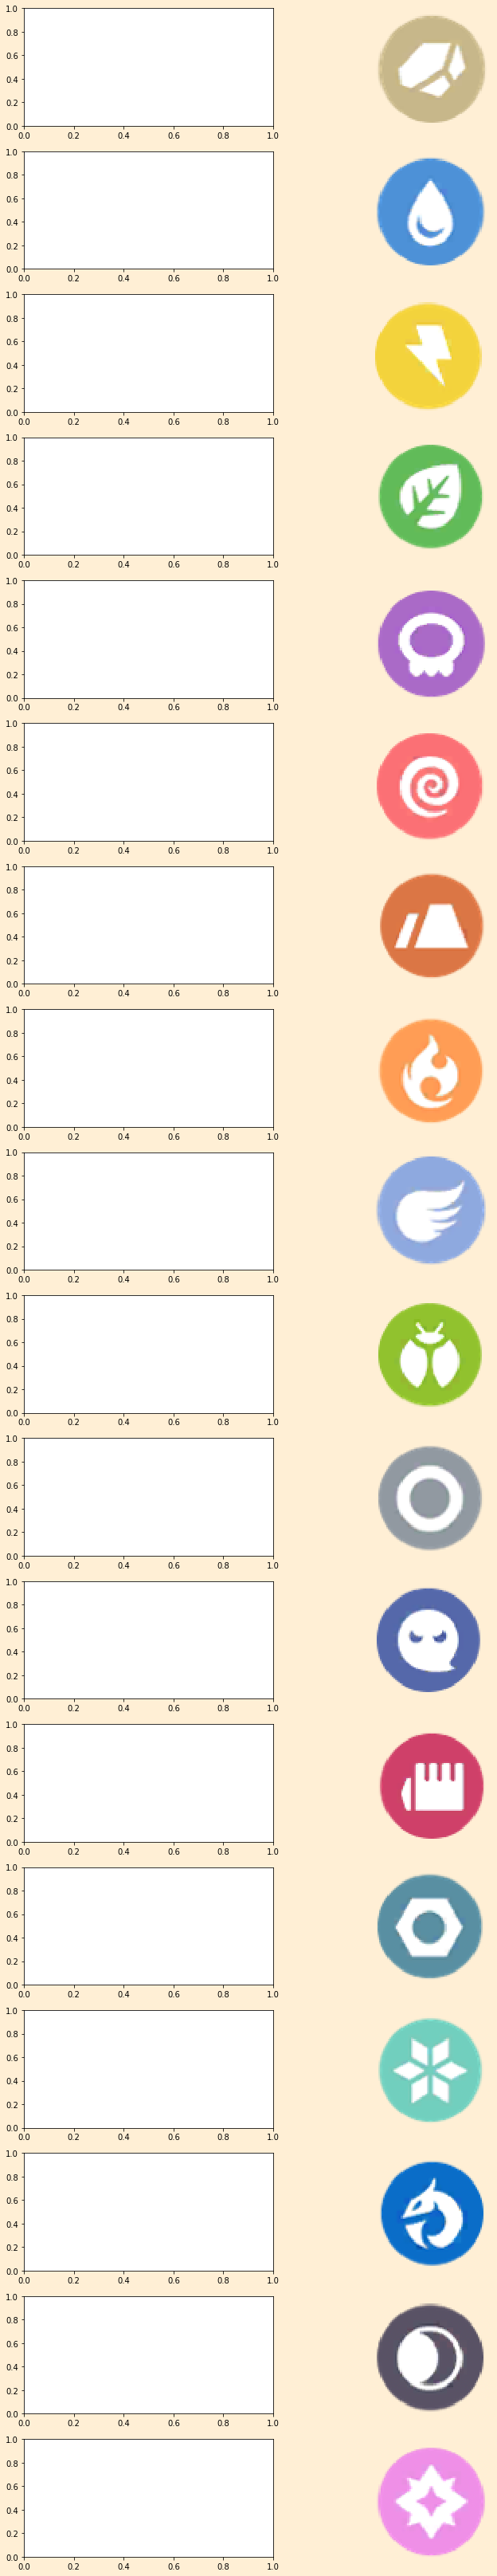

In [36]:
#Creating the type icons
type_icons = {}
for i in typelist:
        type_icons[i] = plt.imread("typeicons/{}.png".format(i.lower()))
row = 0
for i in typelist:
    type_axes[row,1].imshow(type_icons[i])
    type_axes[row,1].axis("off")
    row = row + 1
    
type_fig
    
    

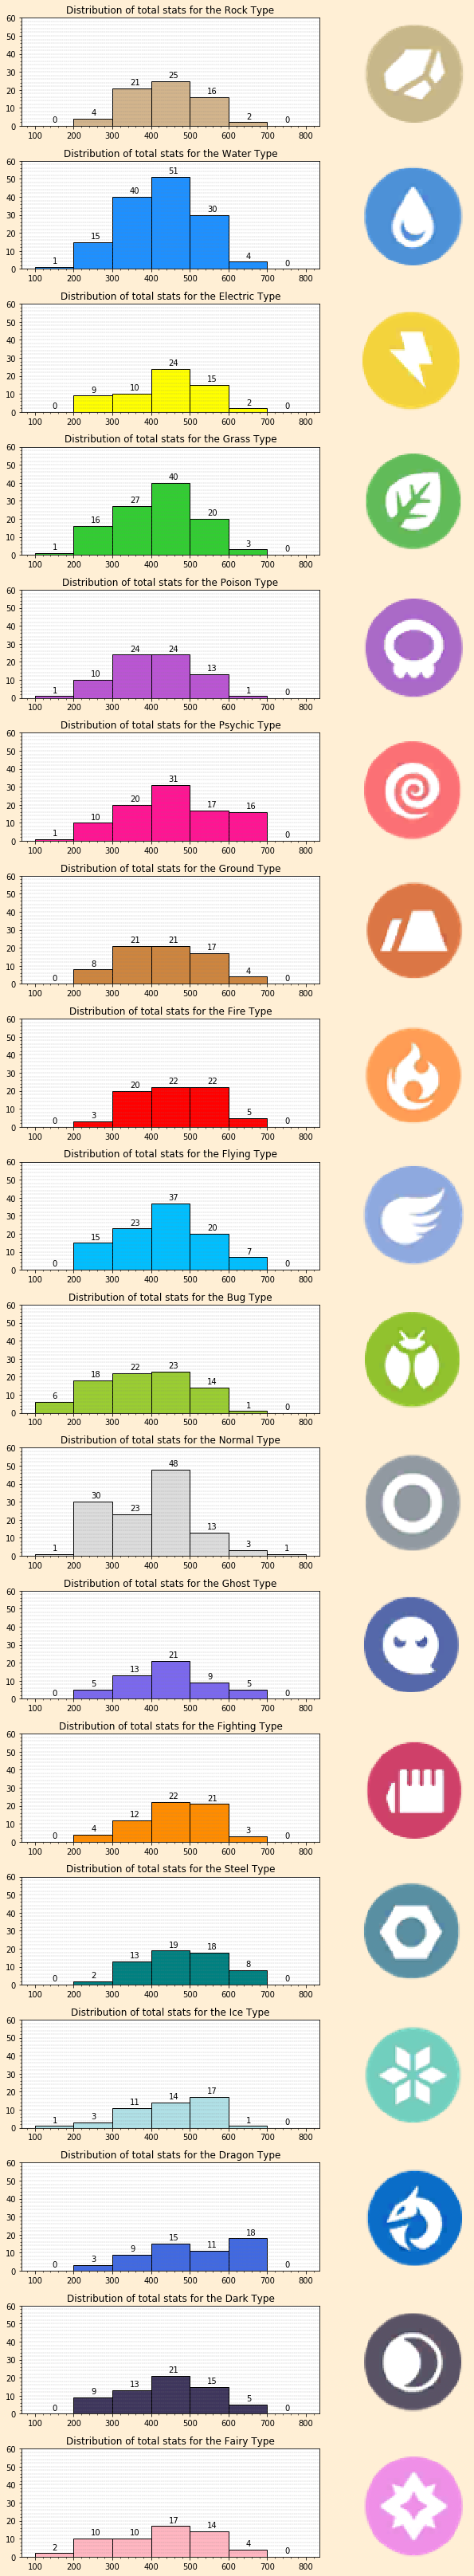

In [37]:
#Creating the graphs
row_graph = 0
for i in typelist:
    counts, bins, patches = type_axes[row_graph,0].hist(type_databases[i].totalstats.values, bins = [100,200,300,400,500,600,700,800], color = type_color[i], edgecolor='black', linewidth=1)
    for count, patch in zip(counts,patches):
        type_axes[row_graph,0].annotate(str(int(count)), xy=(patch.get_x()+45, patch.get_height()+2))
    type_axes[row_graph,0].set_title("Distribution of total stats for the {} Type".format(i), color = "k")
    type_axes[row_graph,0].minorticks_on()
    type_axes[row_graph,0].set_ylim(bottom = 0, top = 60)
    type_axes[row_graph,0].grid(True, which = "both", axis = "y", color = "gray", ls = "-.", lw = 0.25)
    row_graph = row_graph + 1
type_fig.tight_layout()
type_fig    

In [38]:
#Saving
type_fig.savefig("histogramstype.png", facecolor=type_fig.get_facecolor())